# Multiple linear regression model
### Let's mimic the process of building our trading model of SPY, base on the historical data of different stock markets

In [15]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import warnings
from google.colab import drive 
from sklearn import linear_model
drive.mount('/content/gdrive')
%matplotlib inline
warnings.filterwarnings("ignore")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Step 2: Data Spliting

In [32]:
#split the data into (1)train set and (2)test set

indicepanel = pd.read_csv("gdrive/My Drive/historicalData.csv")
Train = indicepanel.iloc[0:1000, :]
Test = indicepanel.iloc[1000:2000, :]
print(Train[0:5])
print(Train.shape, Test.shape)

         Date       spy  spy_lag1  ...         hsi      nikkei       Price
0  2008-01-04 -1.529998 -1.570008  ...  515.349609 -464.320313  143.339996
1  2008-01-07  0.270004 -1.529998  ...  216.951171  -48.830078  141.809998
2  2008-01-08 -2.990006  0.270004  ... -354.060547   99.370117  142.080002
3  2008-01-09  0.589997 -2.990006  ...  768.359375  234.450195  139.089996
4  2008-01-10  1.100006  0.589997  ... -195.560547 -158.209961  139.679993

[5 rows x 12 columns]
(1000, 12) (1000, 12)


## Step 3: Visualize the train data set

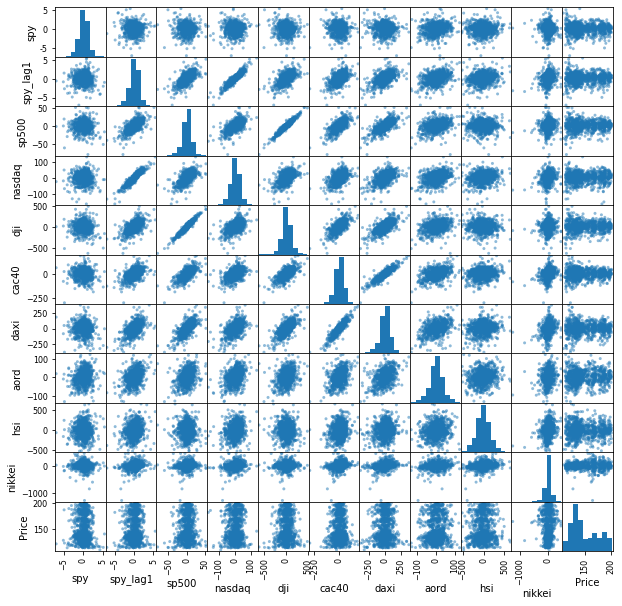

In [3]:
# Generate scatter matrix among all stock markets (and the price of SPY) to observe the association

from pandas.plotting import scatter_matrix
sm = scatter_matrix(Train, figsize=(10, 10))

## Step 4: Check the correlation of each index between spy

In [35]:
# Find the indice with largest correlation
corr_array = Train.iloc[:, :-1].corr()['spy']
print(corr_array)

spy         1.000000
spy_lag1   -0.062932
sp500      -0.107737
nasdaq     -0.032364
dji        -0.101656
cac40      -0.064410
daxi       -0.071876
aord        0.229549
hsi         0.118527
nikkei     -0.084490
Name: spy, dtype: float64


In [69]:
formula = 'Price~spy+spy_lag1+sp500+nasdaq+dji+cac40+aord+daxi+nikkei+hsi'
lm1 = smf.ols(formula=formula, data=Train).fit()
# print(lm.summary())
feature_columns = ["spy", "spy_lag1", "sp500", "nasdaq", "dji", "cac40", "daxi", "aord", "hsi", "nikkei"]
target_column = ["Price"]
df_features = pd.DataFrame(Train, columns=feature_columns)
df_target = pd.DataFrame(Train, columns=target_column)
X = df_features
y = df_target
test_data = pd.DataFrame(Test, columns=feature_columns)
d = {"spy": [0.679993000000024], "spy_lag1": [0.679993000000024], "sp500": [7.58007799999995], "nasdaq": [5.71972699999969], "dji": [59.2910100000008], "cac40": [9.64990299999954], "daxi": [57.5498040000002], "aord": [-52.1000979999998], "hsi": [82.25], "nikkei": [109.191405999998]}
test_row = pd.DataFrame(data=d)
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
predictions = model.predict(test_row)
print(predictions[0:10])


[[114.71167868]]


## Step 5: Make prediction

In [ ]:
Train['PredictedY'] = lm.predict(Train)
Test['PredictedY'] = lm.predict(Test)

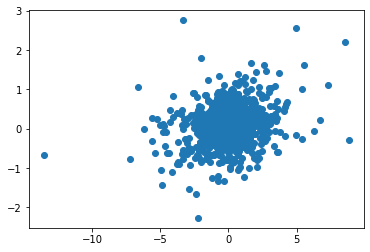

In [ ]:
plt.scatter(Test['spy'], Test['PredictedY'])

In [53]:
!pip install flask-ngrok
!pip install flask
!pip install flask-cors

In [84]:
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok
from flask_cors import CORS, cross_origin
import json
app = Flask(__name__)
cors = CORS(app)
run_with_ngrok(app)

@app.route("/", methods=["POST"])
@cross_origin()
def hello():
    print(request.data)
    data = json.loads(request.data.decode('utf8').replace("'", '"'))
    print("-----------------")
    print(data)
    entries = {"spy": [data["spy"]], "spy_lag1": [data["spyLag"]], "sp500": [data["sp500"]], "nasdaq": [data["nasdaq"]], "dji": [data["dji"]], "cac40": [data["cac40"]], "daxi": [data["cac40"]], "aord": [data["aord"]], "hsi": [data["hsi"]], "nikkei": [data["nikkei"]]}
    row = pd.DataFrame(data=entries)
    result = model.predict(row)
    print(result)
    return str(result)

In [ ]:
if __name__ == "__main__":
  app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://b05b-34-125-215-119.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [26/Nov/2021 05:10:12] "OPTIONS / HTTP/1.1" 200 -
127.0.0.1 - - [26/Nov/2021 05:10:12] "POST / HTTP/1.1" 200 -


b'{"spy":"0.25","spyLag":"0.25","sp500":"0.25","nasdaq":"0.25","dji":"0.25","cac40":"0.25","daxi":"0.25","aord":"0.25","hsi":"0.25","nikkei":"0.25"}'
-----------------
{'spy': '0.25', 'spyLag': '0.25', 'sp500': '0.25', 'nasdaq': '0.25', 'dji': '0.25', 'cac40': '0.25', 'daxi': '0.25', 'aord': '0.25', 'hsi': '0.25', 'nikkei': '0.25'}
[[114.49380764]]


127.0.0.1 - - [26/Nov/2021 05:19:01] "OPTIONS / HTTP/1.1" 200 -
127.0.0.1 - - [26/Nov/2021 05:19:02] "POST / HTTP/1.1" 200 -


b'{"spy":"0.25","spyLag":"0.25","sp500":"0.25","nasdaq":"0.25","dji":"0.25","cac40":"0.25","daxi":"0.25","aord":"0.25","hsi":"0.25","nikkei":"0.25"}'
-----------------
{'spy': '0.25', 'spyLag': '0.25', 'sp500': '0.25', 'nasdaq': '0.25', 'dji': '0.25', 'cac40': '0.25', 'daxi': '0.25', 'aord': '0.25', 'hsi': '0.25', 'nikkei': '0.25'}
[[114.49380764]]


127.0.0.1 - - [26/Nov/2021 05:20:21] "OPTIONS / HTTP/1.1" 200 -
127.0.0.1 - - [26/Nov/2021 05:20:21] "POST / HTTP/1.1" 200 -


b'{"spy":"0.25","spyLag":"0.25","sp500":"0.25","nasdaq":"0.25","dji":"0.25","cac40":"0.25","daxi":"0.25","aord":"0.25","hsi":"0.25","nikkei":"0.25"}'
-----------------
{'spy': '0.25', 'spyLag': '0.25', 'sp500': '0.25', 'nasdaq': '0.25', 'dji': '0.25', 'cac40': '0.25', 'daxi': '0.25', 'aord': '0.25', 'hsi': '0.25', 'nikkei': '0.25'}
[[114.49380764]]


127.0.0.1 - - [26/Nov/2021 05:20:28] "OPTIONS / HTTP/1.1" 200 -
127.0.0.1 - - [26/Nov/2021 05:20:28] "POST / HTTP/1.1" 200 -


b'{"spy":"0.25","spyLag":"0.25","sp500":"0.25","nasdaq":"0.25","dji":"0.25","cac40":"0.25","daxi":"0.25","aord":"0.25","hsi":"0.25","nikkei":"0.25"}'
-----------------
{'spy': '0.25', 'spyLag': '0.25', 'sp500': '0.25', 'nasdaq': '0.25', 'dji': '0.25', 'cac40': '0.25', 'daxi': '0.25', 'aord': '0.25', 'hsi': '0.25', 'nikkei': '0.25'}
[[114.49380764]]


127.0.0.1 - - [26/Nov/2021 05:20:38] "OPTIONS / HTTP/1.1" 200 -
127.0.0.1 - - [26/Nov/2021 05:20:38] "POST / HTTP/1.1" 200 -


b'{"spy":"0.25","spyLag":"0.25","sp500":"0.25","nasdaq":"0.25","dji":"0.25","cac40":"0.25","daxi":"0.25","aord":"1.45","hsi":"0.25","nikkei":"0.25"}'
-----------------
{'spy': '0.25', 'spyLag': '0.25', 'sp500': '0.25', 'nasdaq': '0.25', 'dji': '0.25', 'cac40': '0.25', 'daxi': '0.25', 'aord': '1.45', 'hsi': '0.25', 'nikkei': '0.25'}
[[114.49659363]]


127.0.0.1 - - [26/Nov/2021 05:20:47] "OPTIONS / HTTP/1.1" 200 -
127.0.0.1 - - [26/Nov/2021 05:20:47] "POST / HTTP/1.1" 200 -


b'{"spy":"0.25","spyLag":"0.25","sp500":"2.45","nasdaq":"0.25","dji":"8.32","cac40":"0.25","daxi":"0.25","aord":"1.45","hsi":"0.25","nikkei":"0.25"}'
-----------------
{'spy': '0.25', 'spyLag': '0.25', 'sp500': '2.45', 'nasdaq': '0.25', 'dji': '8.32', 'cac40': '0.25', 'daxi': '0.25', 'aord': '1.45', 'hsi': '0.25', 'nikkei': '0.25'}
[[114.48427628]]


127.0.0.1 - - [26/Nov/2021 05:21:08] "OPTIONS / HTTP/1.1" 200 -
127.0.0.1 - - [26/Nov/2021 05:21:08] "POST / HTTP/1.1" 200 -


b'{"spy":"0.25","spyLag":"0.25","sp500":"2.45","nasdaq":"0.25","dji":"8.32","cac40":"0.25","daxi":"0.25","aord":"1.45","hsi":"0.25","nikkei":"0.25"}'
-----------------
{'spy': '0.25', 'spyLag': '0.25', 'sp500': '2.45', 'nasdaq': '0.25', 'dji': '8.32', 'cac40': '0.25', 'daxi': '0.25', 'aord': '1.45', 'hsi': '0.25', 'nikkei': '0.25'}
[[114.48427628]]


127.0.0.1 - - [26/Nov/2021 05:21:13] "POST / HTTP/1.1" 200 -


b'{"spy":"0.25","spyLag":"0.25","sp500":"2.45","nasdaq":"0.25","dji":"8.32","cac40":"1.32","daxi":"0.25","aord":"1.45","hsi":"0.25","nikkei":"0.25"}'
-----------------
{'spy': '0.25', 'spyLag': '0.25', 'sp500': '2.45', 'nasdaq': '0.25', 'dji': '8.32', 'cac40': '1.32', 'daxi': '0.25', 'aord': '1.45', 'hsi': '0.25', 'nikkei': '0.25'}
[[114.47543907]]


127.0.0.1 - - [26/Nov/2021 05:21:41] "OPTIONS / HTTP/1.1" 200 -
127.0.0.1 - - [26/Nov/2021 05:21:41] "POST / HTTP/1.1" 200 -


b'{"spy":"1.25","spyLag":"0.25","sp500":"2.45","nasdaq":"0.25","dji":"8.32","cac40":"1.32","daxi":"0.25","aord":"1.45","hsi":"0.25","nikkei":"0.25"}'
-----------------
{'spy': '1.25', 'spyLag': '0.25', 'sp500': '2.45', 'nasdaq': '0.25', 'dji': '8.32', 'cac40': '1.32', 'daxi': '0.25', 'aord': '1.45', 'hsi': '0.25', 'nikkei': '0.25'}
[[113.95470908]]


127.0.0.1 - - [26/Nov/2021 05:21:51] "OPTIONS / HTTP/1.1" 200 -
127.0.0.1 - - [26/Nov/2021 05:21:51] "POST / HTTP/1.1" 200 -


b'{"spy":"1.25","spyLag":"-0.35","sp500":"2.45","nasdaq":"0.25","dji":"8.32","cac40":"1.32","daxi":"0.25","aord":"1.45","hsi":"0.25","nikkei":"0.25"}'
-----------------
{'spy': '1.25', 'spyLag': '-0.35', 'sp500': '2.45', 'nasdaq': '0.25', 'dji': '8.32', 'cac40': '1.32', 'daxi': '0.25', 'aord': '1.45', 'hsi': '0.25', 'nikkei': '0.25'}
[[113.44326398]]


127.0.0.1 - - [26/Nov/2021 05:22:24] "OPTIONS / HTTP/1.1" 200 -
[2021-11-26 05:22:25,135] ERROR in app: Exception on / [POST]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.7/dist-packages/flask_cors/extension.py", line 165, in wrapped_function
    return cors_after_request(app.make_response(f(*args, **kwargs)))
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/usr/local/lib/python3.7/dist-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "/usr/local/lib/python3.7/

b'{"spy":"1.25","spyLag":"-","sp500":"2.45","nasdaq":"0.25","dji":"8.32","cac40":"1.32","daxi":"0.25","aord":"1.45","hsi":"70","nikkei":"0.25"}'
-----------------
{'spy': '1.25', 'spyLag': '-', 'sp500': '2.45', 'nasdaq': '0.25', 'dji': '8.32', 'cac40': '1.32', 'daxi': '0.25', 'aord': '1.45', 'hsi': '70', 'nikkei': '0.25'}


127.0.0.1 - - [26/Nov/2021 05:25:12] "OPTIONS / HTTP/1.1" 200 -
127.0.0.1 - - [26/Nov/2021 05:25:12] "POST / HTTP/1.1" 200 -


b'{"spy":"1.25","spyLag":"1.23","sp500":"10.76","nasdaq":"70.09","dji":"9.42","cac40":"33.64","daxi":"39.59","aord":"137","hsi":"621","nikkei":"838"}'
-----------------
{'spy': '1.25', 'spyLag': '1.23', 'sp500': '10.76', 'nasdaq': '70.09', 'dji': '9.42', 'cac40': '33.64', 'daxi': '39.59', 'aord': '137', 'hsi': '621', 'nikkei': '838'}
[[114.29943459]]
